In [1]:
import time
import string
import random
import pandas as pd
import numpy as np
from scipy import stats  

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm

from scipy import stats

from sklearn.linear_model import (LinearRegression, Lasso, LassoCV, LassoLars, LassoLarsCV, 
LassoLarsIC, MultiTaskLasso, MultiTaskLassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV,
MultiTaskElasticNet, MultiTaskElasticNetCV, Lars, LarsCV, OrthogonalMatchingPursuit, 
OrthogonalMatchingPursuitCV, BayesianRidge, ARDRegression, SGDRegressor, Perceptron, 
PassiveAggressiveRegressor, RANSACRegressor, HuberRegressor, TheilSenRegressor)

from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor,
ExtraTreesRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor)

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import *
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pickle

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

## Importing the dataset

In [2]:
df = pd.read_csv('automobile.csv')

## Main characteristics of the imported data

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450


In [4]:
df.shape

(205, 26)

In [5]:
df.columns.unique()

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Data cleaning

For the shake of simplicity, all the **missing values** were replaced by the **mean value** of the corresponding variable. 

In [7]:
df['normalized-losses'] = df['normalized-losses'].replace('?', '999999')
df['normalized-losses'] = df['normalized-losses'].astype(int)
df['normalized-losses'] = df['normalized-losses'].replace(999999, np.nan)
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['normalized-losses'].isna().sum()

0

In [8]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
#df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [10]:
#df = df.select_dtypes(exclude=['float'])
#for col in df.columns:
#    print(df[col].unique()) # to print categories name only

In [11]:
df['num-of-doors'] = df['num-of-doors'].replace('?', 'other')

In [12]:
df['price'] = df['price'].replace('?', -11111)
df['price'] = df['price'].astype(int)
df['price'] = df['price'].replace(-11111, np.nan)
df['price'].fillna(df['price'].mean(), inplace=True)
df['price'].isna().sum()
#df['price'].unique()

0

In [13]:
df['bore'] = df['bore'].replace('?', '999999')
df['bore'] = df['bore'].astype(float)
df['bore'] = df['bore'].replace(999999, np.nan)
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['bore'].isna().sum()
#df['bore'].unique()

0

In [14]:
df['stroke'] = df['stroke'].replace('?', '999999')
df['stroke'] = df['stroke'].astype(float)
df['stroke'] = df['stroke'].replace(999999, np.nan)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['stroke'].isna().sum()
#df['stroke'].unique()

0

In [15]:
df['horsepower'] = df['horsepower'].replace('?', '999999')
df['horsepower'] = df['horsepower'].astype(int)
df['horsepower'] = df['horsepower'].replace(999999, np.nan)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['horsepower'].isna().sum()
#df['horsepower'].unique()

0

In [16]:
df['peak-rpm'] = df['peak-rpm'].replace('?', '999999')
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['peak-rpm'] = df['peak-rpm'].replace(999999, np.nan)
df['peak-rpm'].fillna(df['peak-rpm'].mean(), inplace=True)
df['peak-rpm'].isna().sum()
#df['peak-rpm'].unique()

0

In [17]:
df['symboling'] = df['symboling'].astype(str)

The following piece of code would give us all the data **columns** along with their **unique values**.

In [18]:
#for cols in df.columns:
#    print(cols+":", df[cols].unique())

In [19]:
#df.dtypes.value_counts()

In [20]:
df.dtypes

symboling             object
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Our dataset consists of 11 **categorical**, 10 **float** and 5 **integer** variables. 25 variables are used as **predictors** and the **'price'** variable is the target variable, for the needs of this work.  

In [21]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Exploratory Data Analysis

After dealing with missing values and adapting the data type to meaningful ones, **exploratory data analysis** techniques are performed on the modified dataset. 

In [37]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [38]:
df.shape

(205, 26)

In [39]:
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [40]:
df.describe(include=[np.object])

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,22,2,2,3,5,3,2,7,7,8
top,0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,32,185,168,114,96,120,202,148,159,94


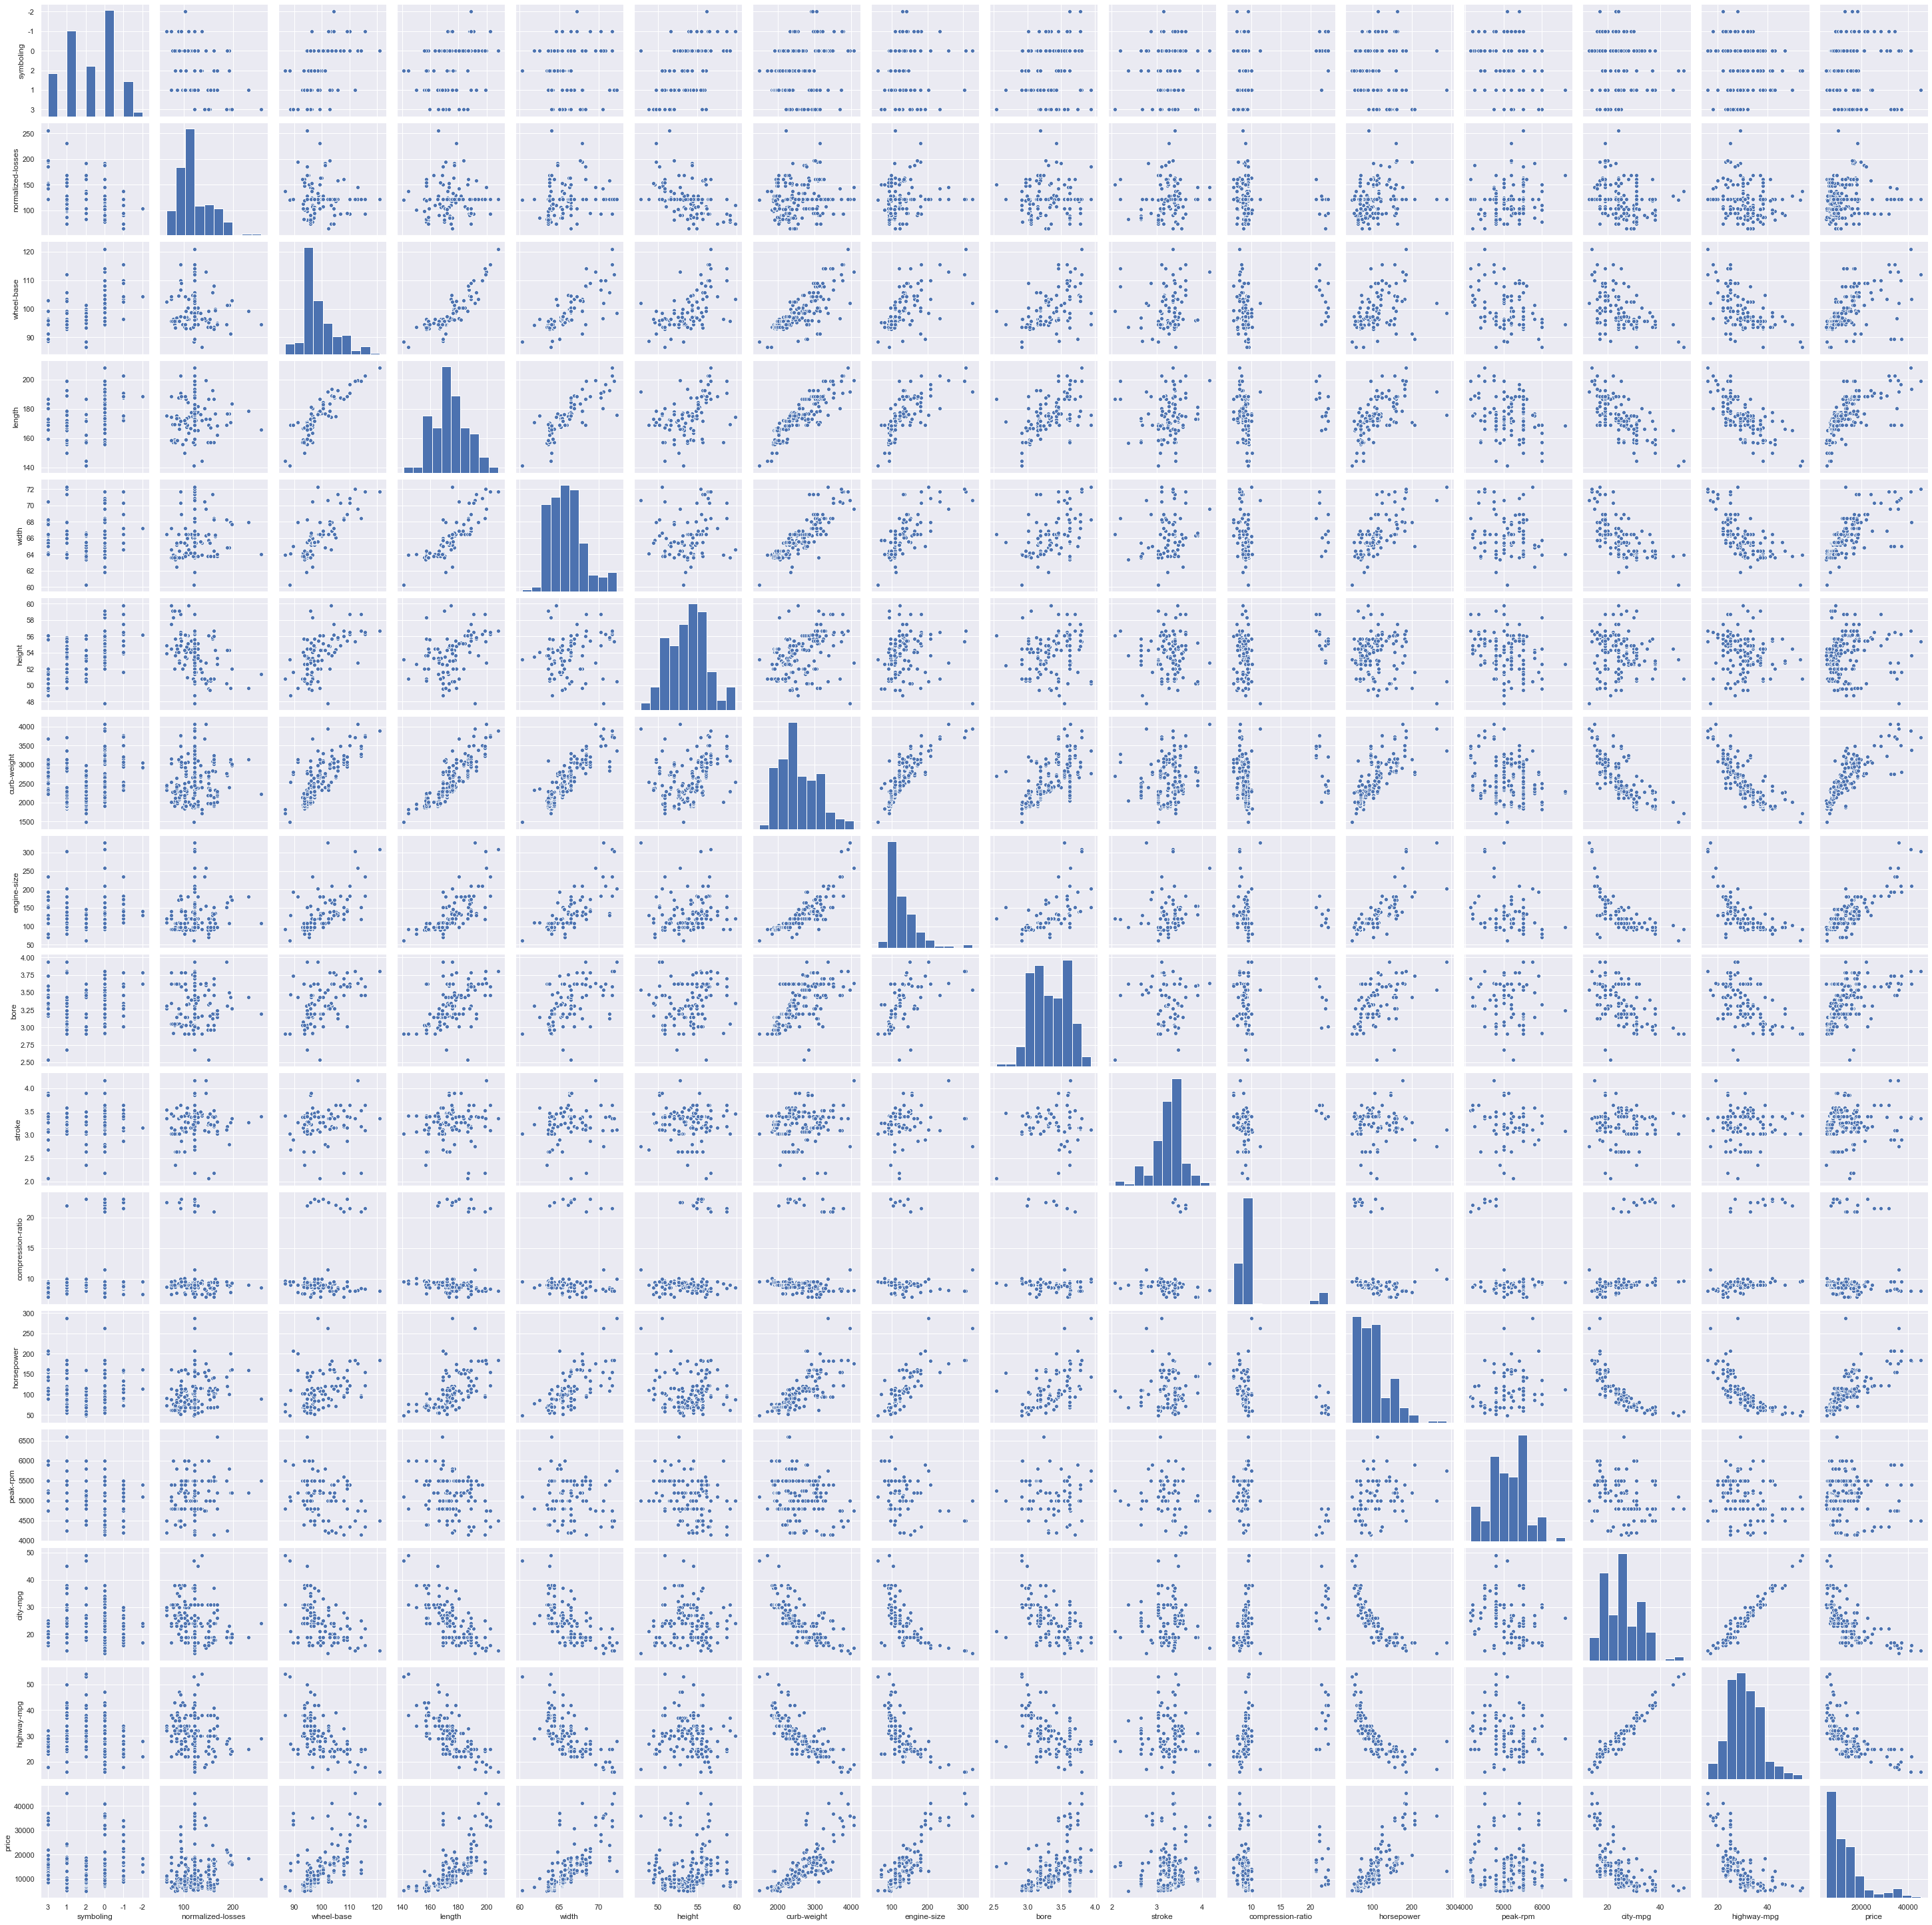

In [30]:
sns.pairplot(df)
plt.show()

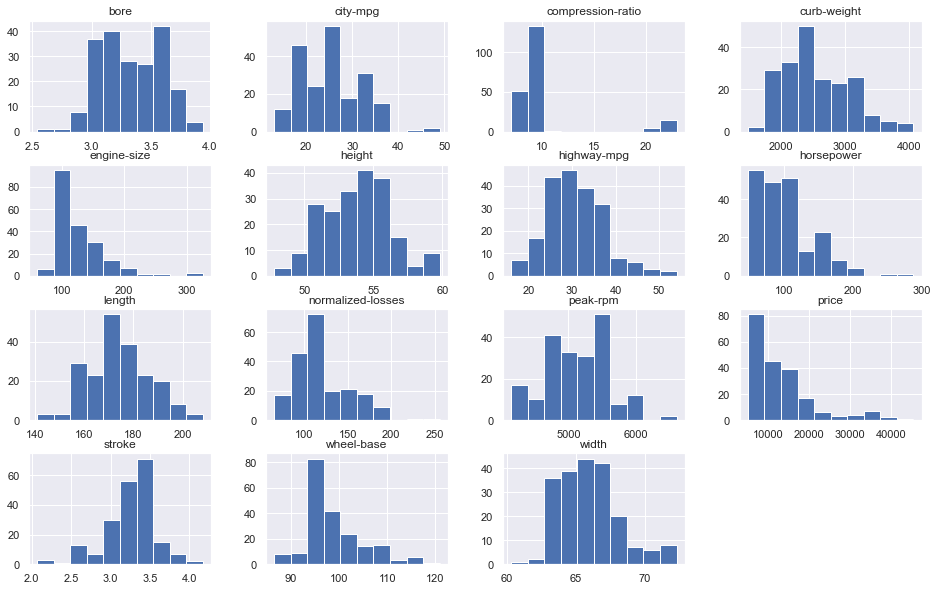

In [41]:
df.hist(figsize=(16,10), xrot=0)
plt.show()

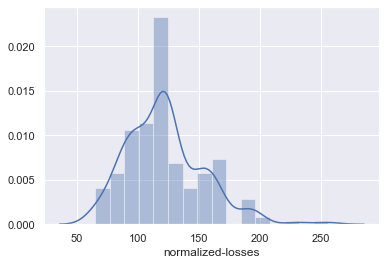

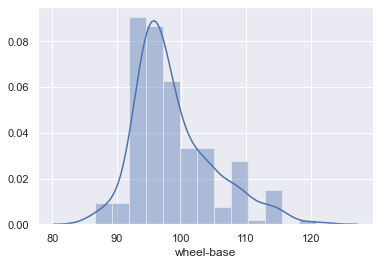

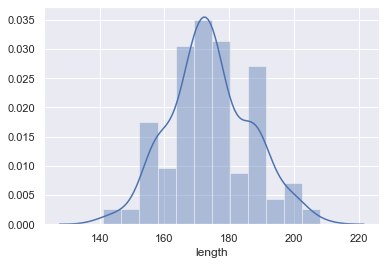

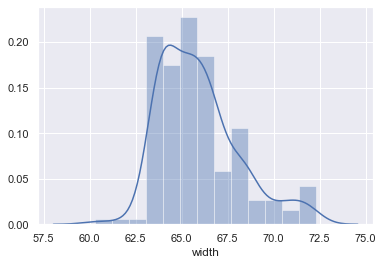

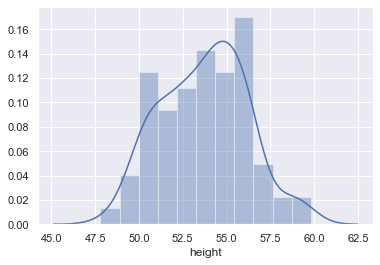

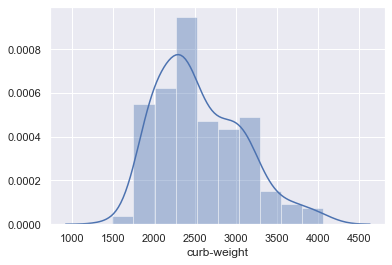

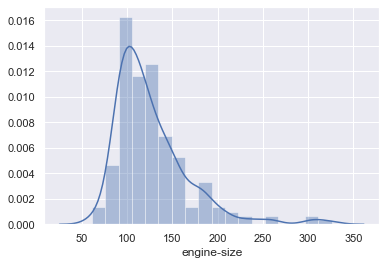

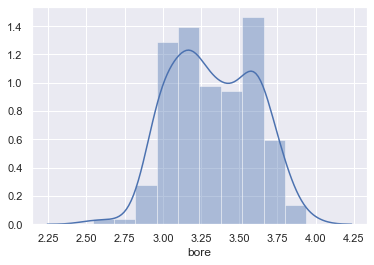

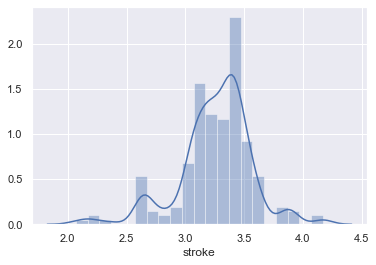

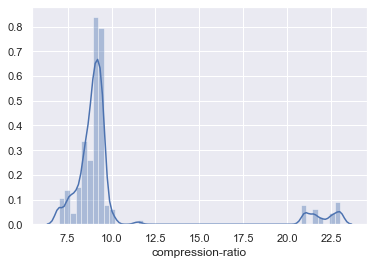

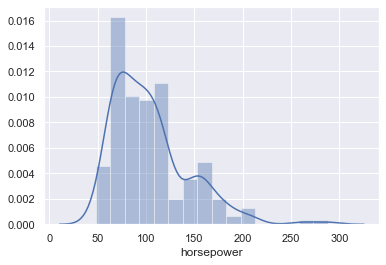

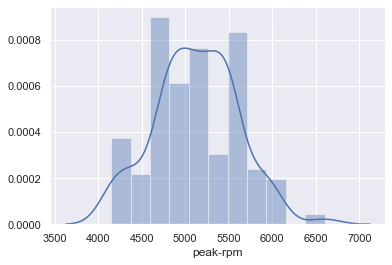

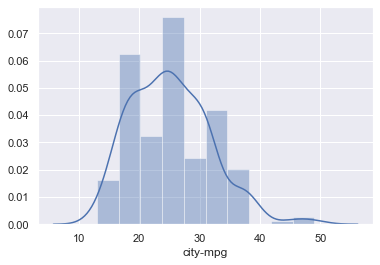

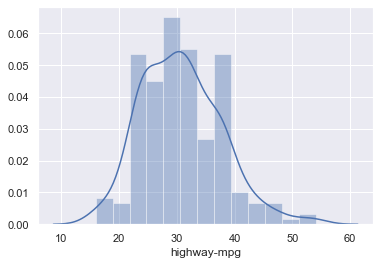

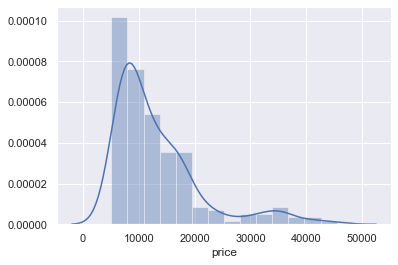

In [42]:
for name in df.dtypes[(df.dtypes=='float64')|(df.dtypes=='int64')].index:
    sns.distplot(df[name], kde=True, color='b')
    plt.show()

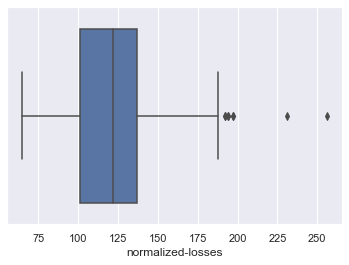

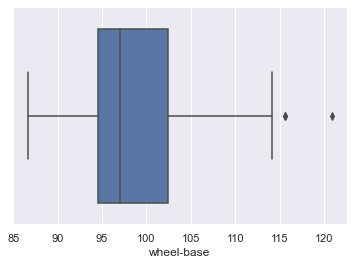

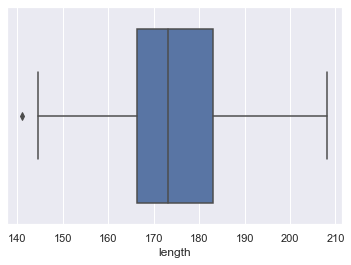

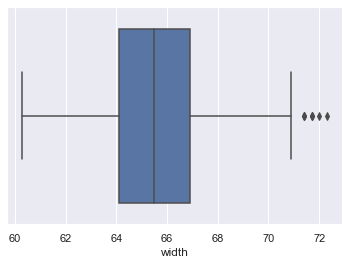

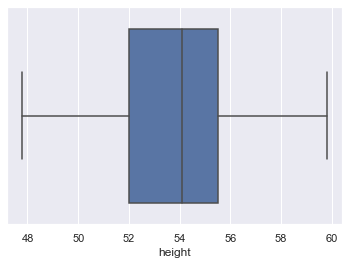

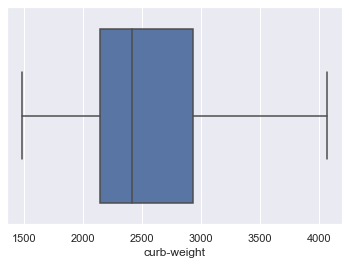

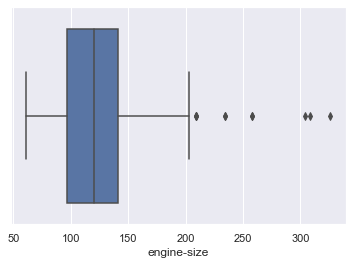

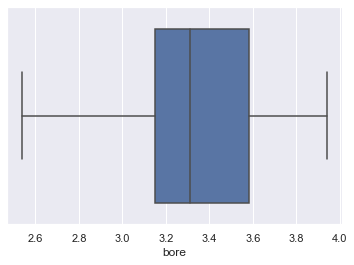

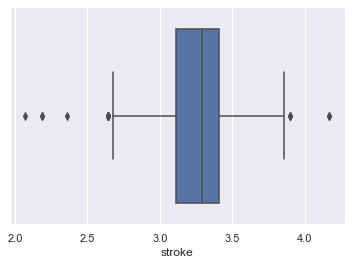

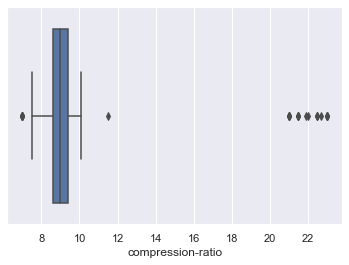

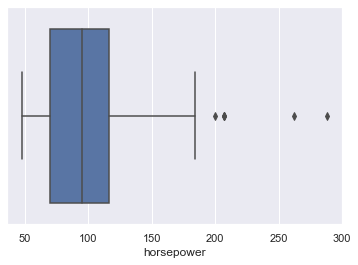

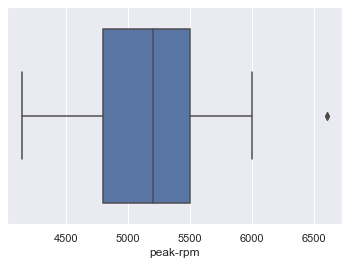

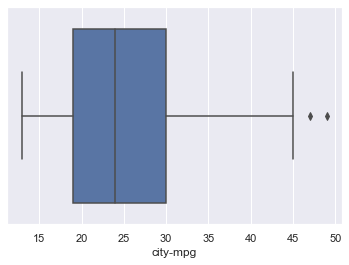

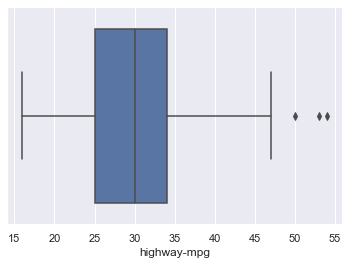

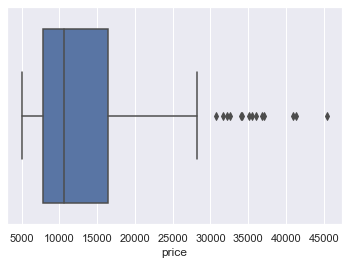

In [43]:
for name in df.dtypes[(df.dtypes=='float64')|(df.dtypes=='int64')].index:
    sns.boxplot(x=name, data=df)
    plt.show()

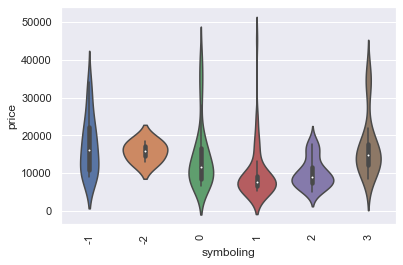

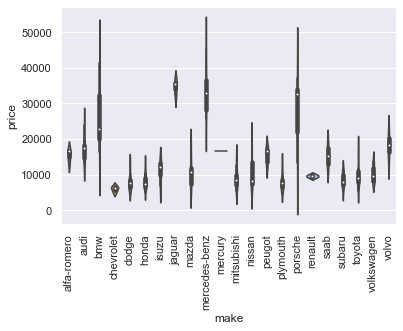

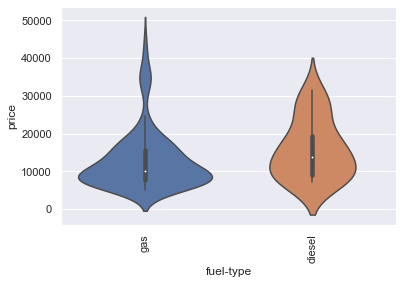

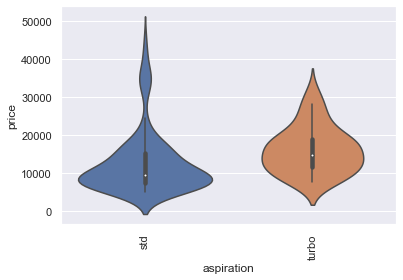

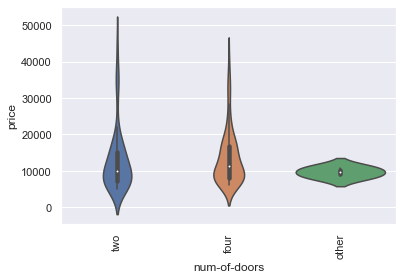

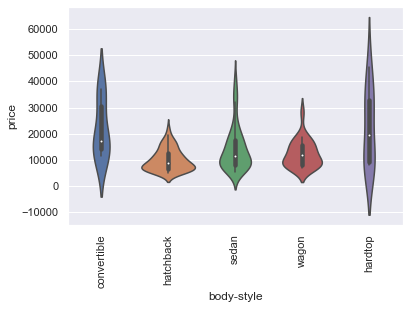

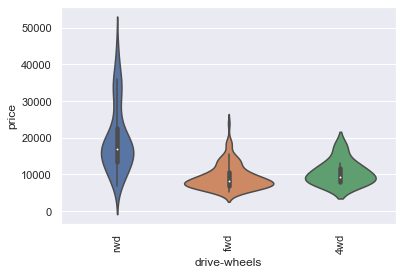

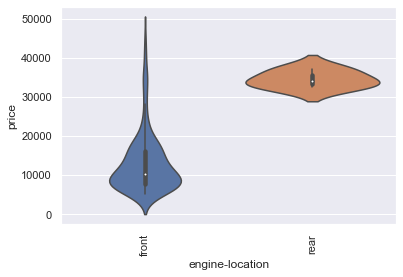

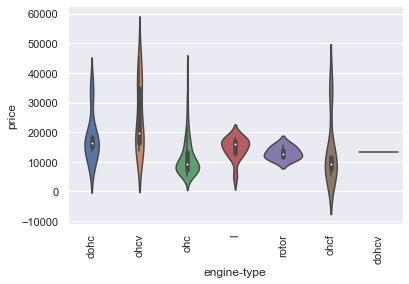

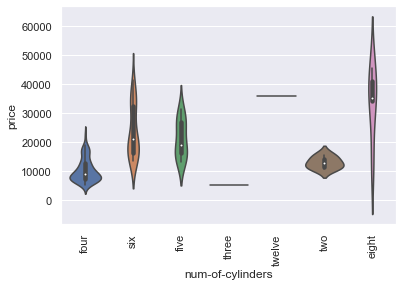

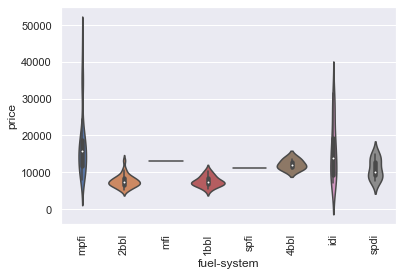

In [44]:
#for name in df.dtypes[(df.dtypes=='object')].index:
#    sns.violinplot(y=name, data=df)
#    plt.show()
for name in df.dtypes[df.dtypes=='object'].index:
    sns.violinplot(y='price', x=name,  data=df)
    plt.xticks(rotation=90)
    plt.show()
    
#sns.violinplot(y='price',x='symboling', data=df)
#plt.show()

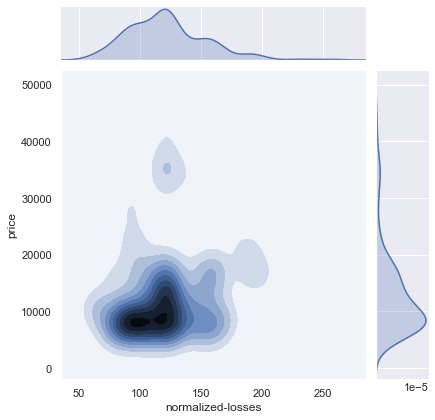

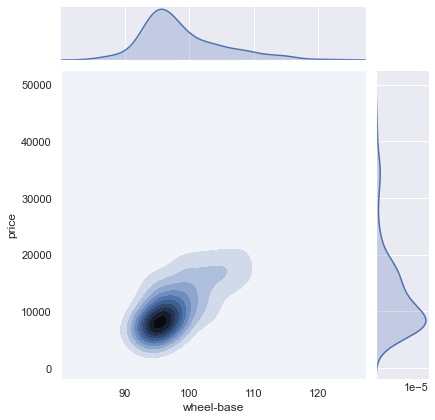

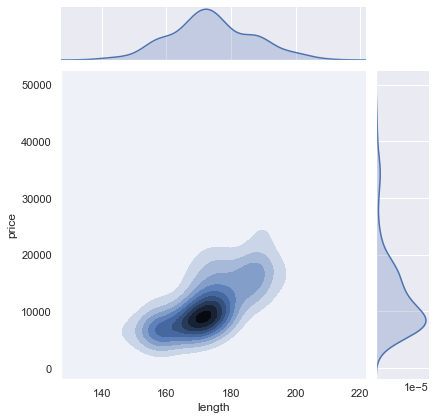

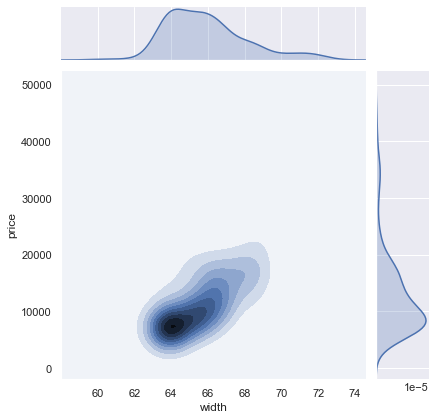

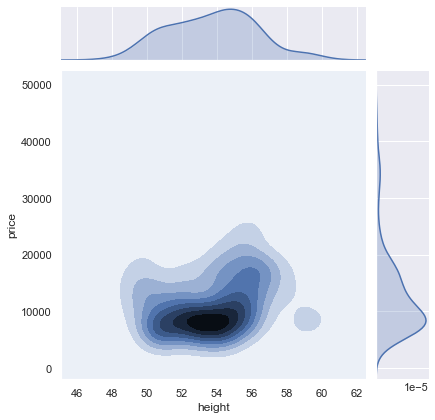

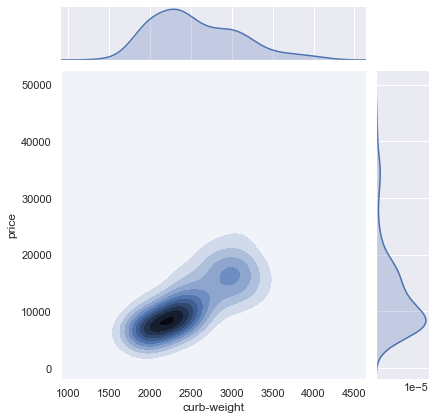

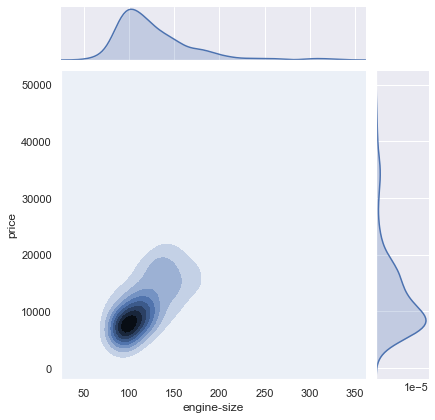

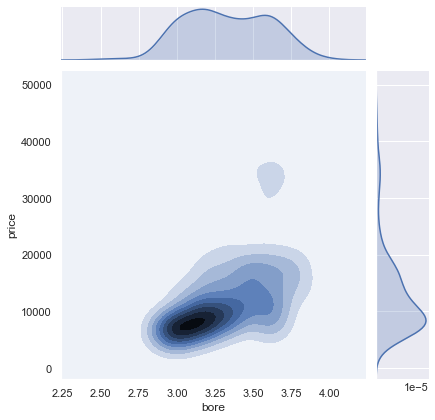

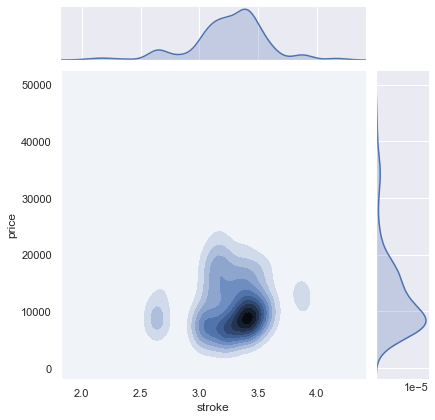

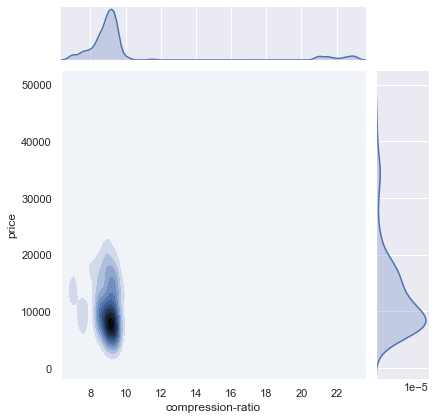

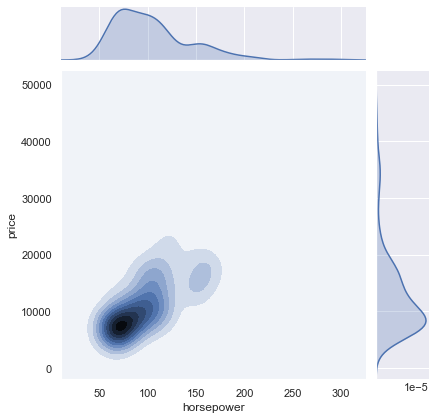

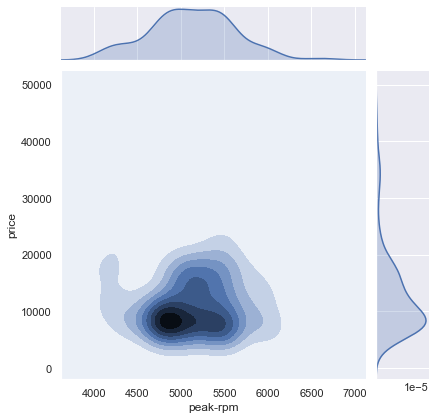

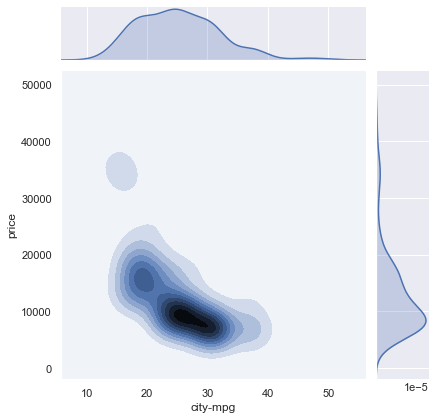

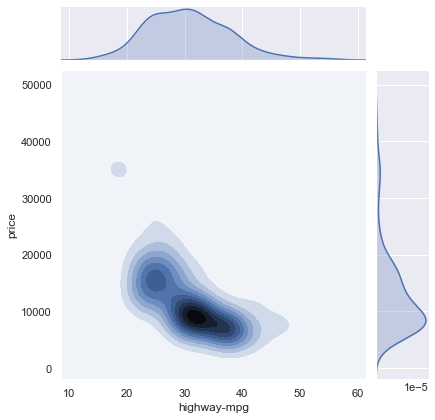

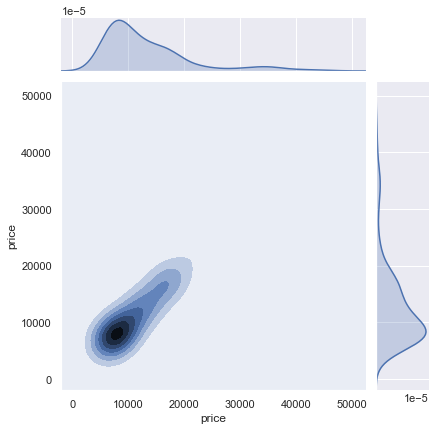

In [45]:
for name in df.dtypes[(df.dtypes=='float64')|(df.dtypes=='int64')].index:
    sns.jointplot(x=df[name], kind='kde', y=df.price)
    plt.show()

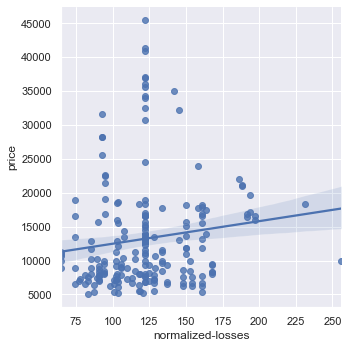

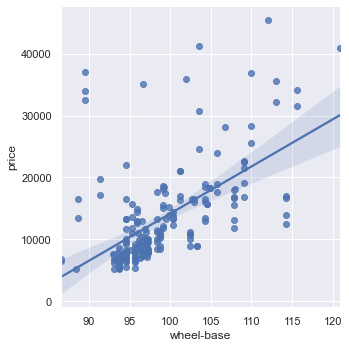

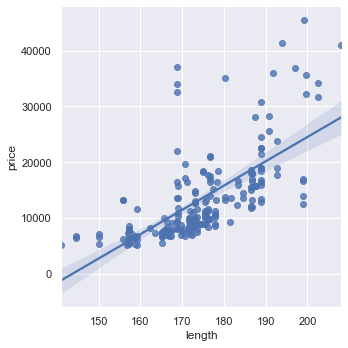

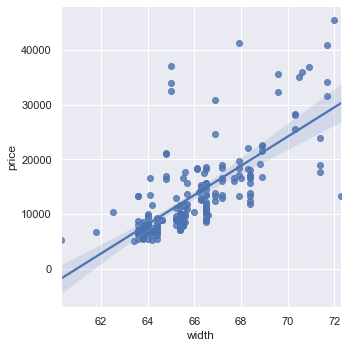

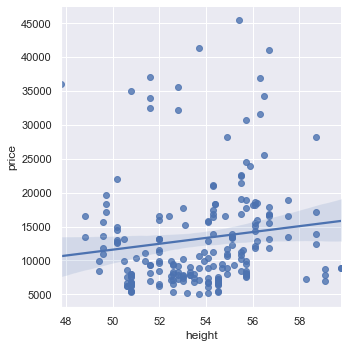

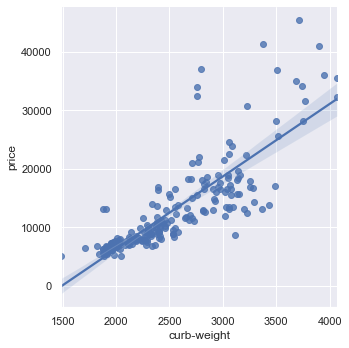

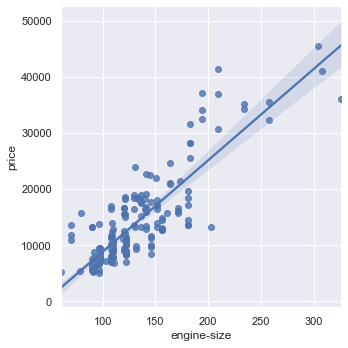

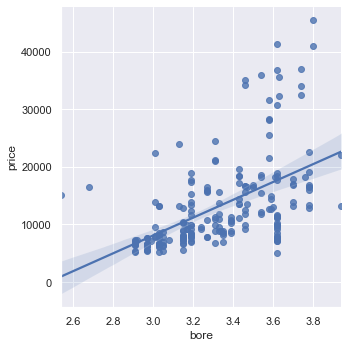

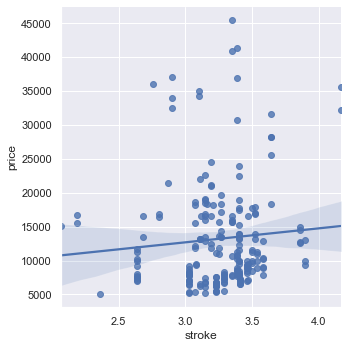

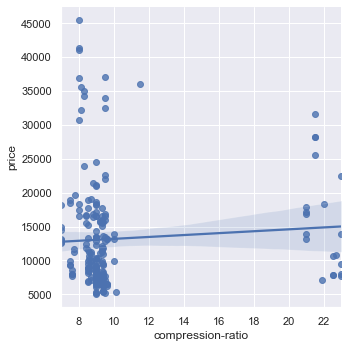

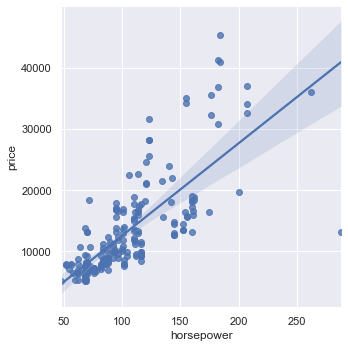

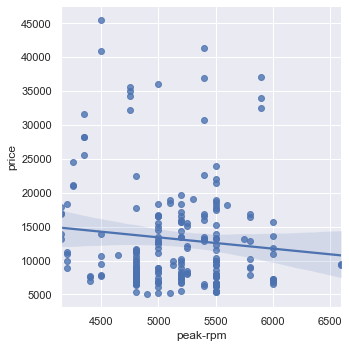

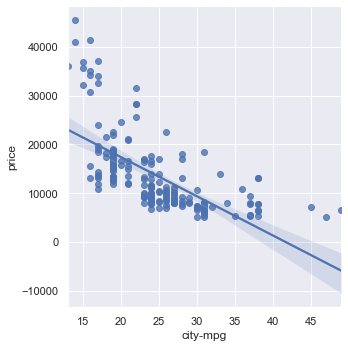

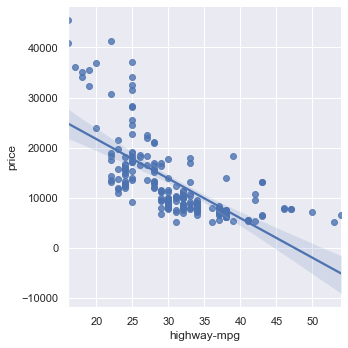

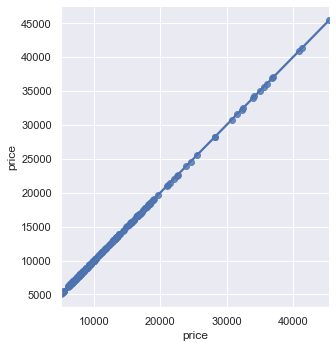

In [46]:
for name in df.dtypes[(df.dtypes=='float64')|(df.dtypes=='int64')].index:
    sns.lmplot(x=name, y='price', data=df)
    plt.show()

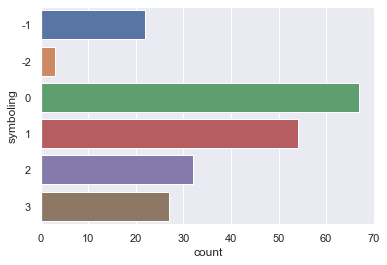

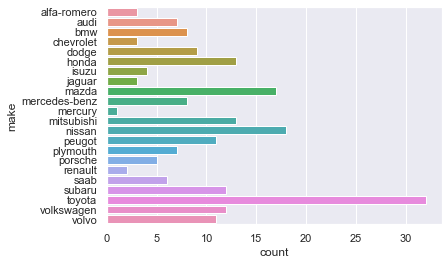

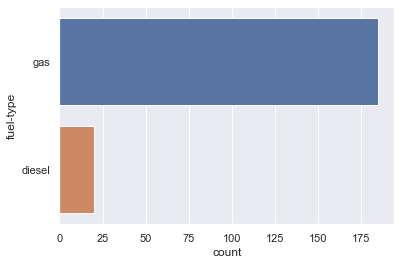

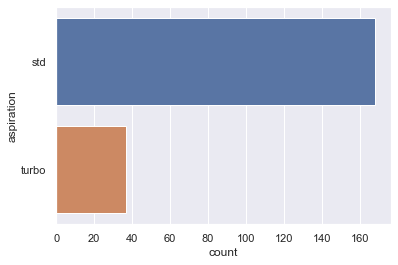

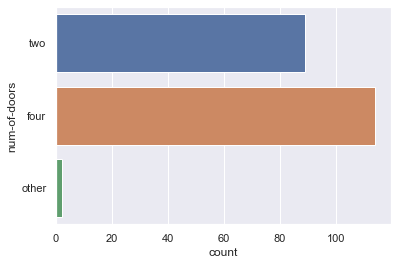

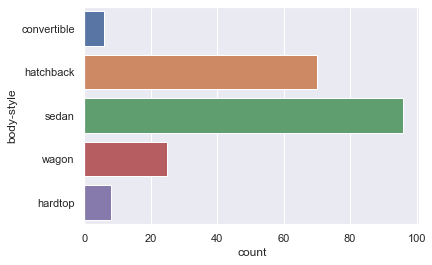

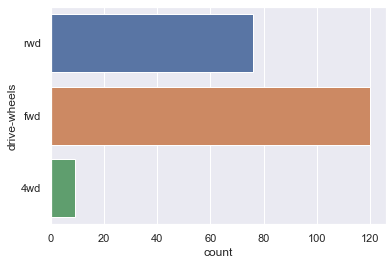

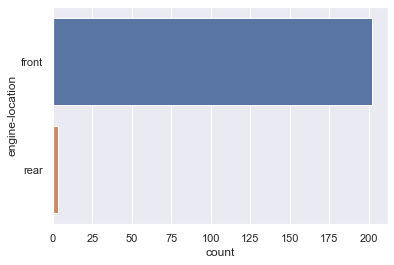

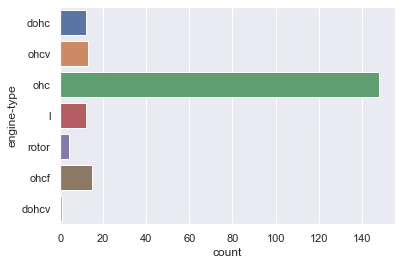

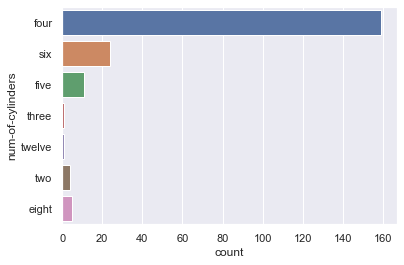

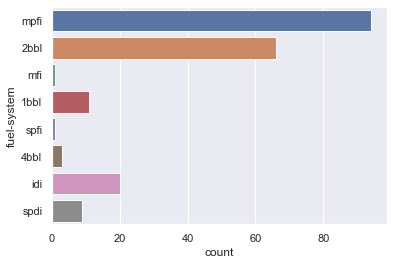

In [47]:
for name in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=name, data=df)
    plt.show()

In [48]:
correlations = df.corr()

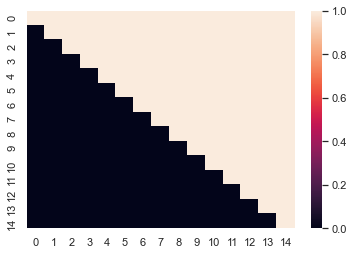

In [49]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(mask)
plt.show()

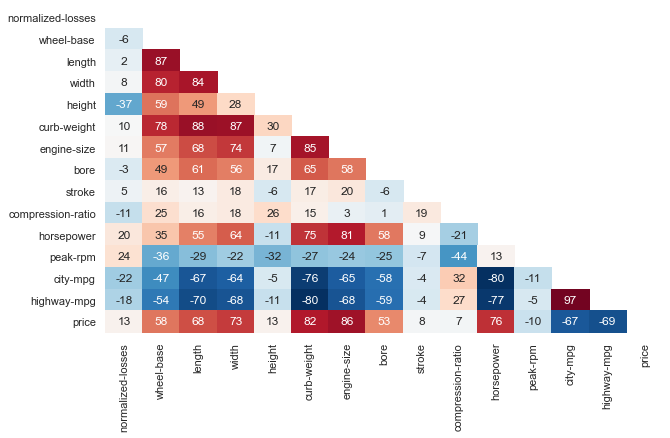

In [50]:
sns.set_style('white')
plt.figure(figsize=(10,6))
sns.heatmap(correlations * 100, cmap='RdBu_r',
            annot=True,
            fmt='.0f', mask = mask, cbar=False)
plt.show()

## Feature Engineering

At this point, the creation of indicator variables could take place:

e.g. df['fuel_and_aspiration'] = ((df[fuel-type] == 'gas')&(df.aspiration == 'std'))

All the relevant **features**, that the analyst considers as important, could be **engineered**. For the needs of this work, no other features will be engineered.

## Analytical Base Table

In order to **finalize** our ABT, there is a need for **transforming** the **categorical variables** into **indicator variables**. 

In [26]:
df.describe(include='object')

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,22,2,2,3,5,3,2,7,7,8
top,0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,32,185,168,114,96,120,202,148,159,94


In [27]:
abt = pd.get_dummies(df, columns=['symboling','make','fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])

In [28]:
abt

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling_-1,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_other,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,122.000,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111.000,5000.000,21,27,13495.000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,122.000,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111.000,5000.000,21,27,16500.000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,122.000,94.500,171.200,65.500,52.400,2823,152,2.680,3.470,9.000,154.000,5000.000,19,26,16500.000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,164.000,99.800,176.600,66.200,54.300,2337,109,3.190,3.400,10.000,102.000,5500.000,24,30,13950.000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,164.000,99.400,176.600,66.400,54.300,2824,136,3.190,3.400,8.000,115.000,5500.000,18,22,17450.000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.000,109.100,188.800,68.900,55.500,2952,141,3.780,3.150,9.500,114.000,5400.000,23,28,16845.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,95.000,109.100,188.800,68.800,55.500,3049,141,3.780,3.150,8.700,160.000,5300.000,19,25,19045.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,95.000,109.100,188.800,68.900,55.500,3012,173,3.580,2.870,8.800,134.000,5500.000,18,23,21485.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,95.000,109.100,188.800,68.900,55.500,3217,145,3.010,3.400,23.000,106.000,4800.000,26,27,22470.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [29]:
pd.set_option('display.max_rows', 100)
abt.dtypes

normalized-losses          float64
wheel-base                 float64
length                     float64
width                      float64
height                     float64
curb-weight                  int64
engine-size                  int64
bore                       float64
stroke                     float64
compression-ratio          float64
horsepower                 float64
peak-rpm                   float64
city-mpg                     int64
highway-mpg                  int64
price                      float64
symboling_-1                 uint8
symboling_-2                 uint8
symboling_0                  uint8
symboling_1                  uint8
symboling_2                  uint8
symboling_3                  uint8
make_alfa-romero             uint8
make_audi                    uint8
make_bmw                     uint8
make_chevrolet               uint8
make_dodge                   uint8
make_honda                   uint8
make_isuzu                   uint8
make_jaguar         

In [30]:
abt.dtypes.value_counts()

uint8      67
float64    11
int64       4
dtype: int64

After **converting** the categorical variables into indicator variables, a total number of 82 variables is obtained. 81 are **predictors** and 1 is the **target** variable. 

In [31]:
abt.to_csv('analytical_base_table.csv', index = None)

In [32]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


In [33]:
X = abt.drop('price', axis=1)
y = abt.price

In [34]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Linear Regression

In [35]:
linear_model.score(X, y)

0.9613405218866399

In [61]:
Xpred = linear_model.predict(X)

In [62]:
#linear_model.coef_

In [63]:
linear_model.intercept_

-43782.59223314888

In [64]:
linear_importance = linear_model.coef_

In [65]:
#for i,v in enumerate(linear_importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

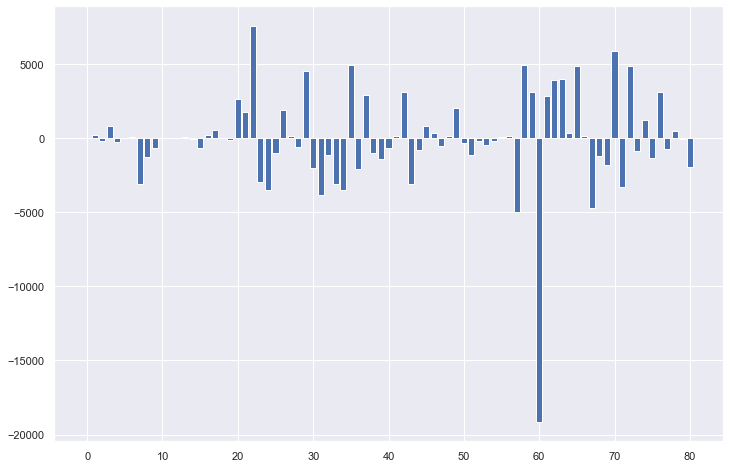

In [66]:
# plot feature importance
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(linear_importance))], linear_importance)
plt.show()

In [67]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

## Lasso Regression

In [68]:
lasso_model = Lasso(alpha=2, random_state=1234, max_iter=10000)
lasso_model.fit(X,y)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=10000, normalize=False,
      positive=False, precompute=False, random_state=1234, selection='cyclic',
      tol=0.0001, warm_start=False)

In [69]:
lasso_model.score(X, y)

0.9607621523294737

In [70]:
#lasso_model.coef_

In [71]:
lasso_model.sparse_coef_

<1x81 sparse matrix of type '<class 'numpy.float64'>'
	with 67 stored elements in Compressed Sparse Row format>

In [72]:
lasso_model.intercept_

-40644.12994145408

In [73]:
lasso_importance = lasso_model.coef_

In [74]:
#for i,v in enumerate(lasso_importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

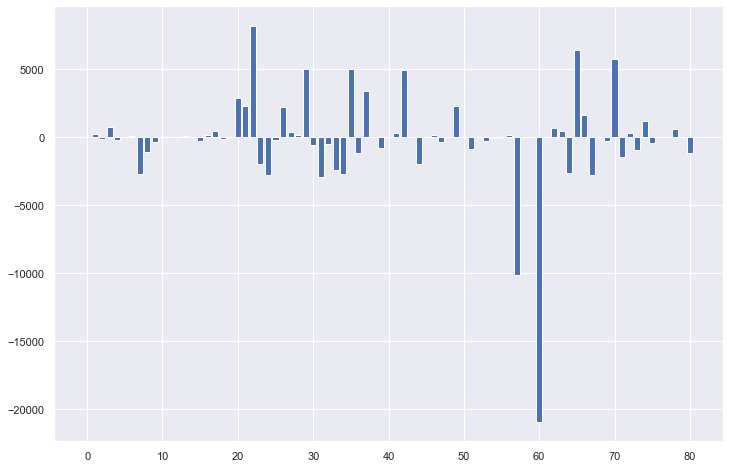

In [75]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(lasso_importance))], lasso_importance)
plt.show()

## Ridge Regression

In [76]:
ridge_model = Ridge(alpha=1.0, random_state=1234)
ridge_model.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1234, solver='auto', tol=0.001)

In [77]:
ridge_model.score(X,y)

0.9494520402145964

In [78]:
#ridge_model.coef_

In [79]:
ridge_model.intercept_

-42902.92800323981

In [80]:
ridge_importance = ridge_model.coef_

In [81]:
#for i,v in enumerate(ridge_importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

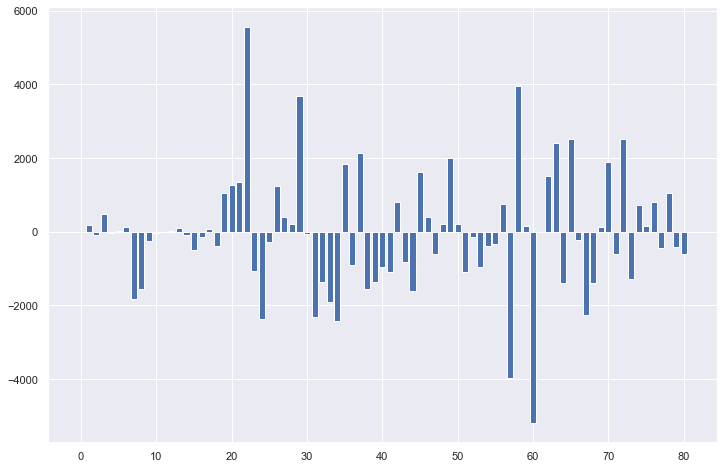

In [82]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(ridge_importance))], ridge_importance)
plt.show()

## ElasticNet Regression

In [83]:
elastic_model = ElasticNet(alpha=0.05, random_state=1234)
elastic_model.fit(X,y)

ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
elastic_model.score(X,y)

0.9246172567642418

In [85]:
#elastic_model.coef_

In [86]:
elastic_model.intercept_

-40004.40404504101

In [87]:
elastic_importance = elastic_model.coef_

In [88]:
#for i,v in enumerate(elastic_importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

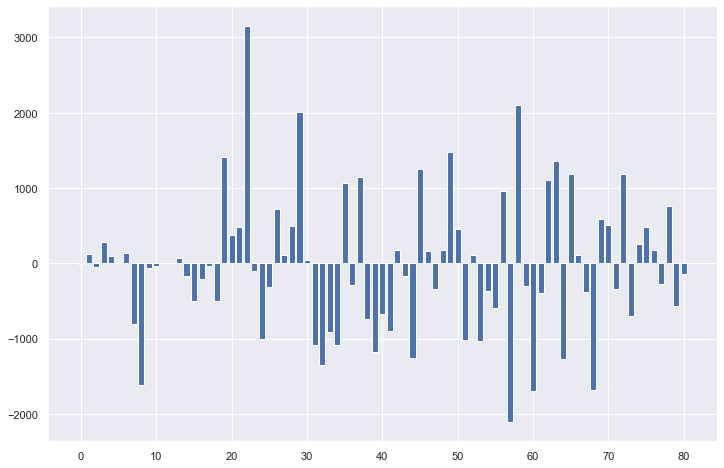

In [89]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(elastic_importance))], elastic_importance)
plt.show()

## SGDRegressor

In [90]:
sgd_model = SGDRegressor(alpha=2, random_state=1234)

In [91]:
sgd_model.fit(X,y)

SGDRegressor(alpha=2, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1234,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [92]:
sgd_model.score(X,y)

-1.4896394371180595e+25

In [93]:
sgd_model.intercept_

array([1.6607326e+09])

In [94]:
sgd_model.coef_

array([-1.06167204e+12, -1.16442461e+11, -2.28945942e+11, -1.01796883e+11,
       -9.14757757e+10, -4.03819580e+12,  1.56925956e+11, -1.12865724e+10,
       -6.42281196e+09, -8.46685350e+10,  5.82128258e+10, -3.84464126e+12,
       -1.30310074e+11, -1.82786754e+11,  2.19187859e+09, -1.64403839e+09,
        1.77968668e+08,  1.74726753e+09, -2.87399438e+09, -1.46055749e+09,
       -4.94495566e+08,  5.47584731e+09,  6.54756916e+08,  3.96205548e+09,
        1.62611170e+08,  5.91802684e+09, -3.81947936e+09, -1.25871075e+08,
       -6.71496349e+08,  2.85098597e+09, -1.45334159e+08, -7.30632244e+09,
       -4.71957829e+09, -5.26219461e+09, -3.97924268e+09, -4.15108011e+09,
        5.76553151e+08, -1.54896262e+09,  4.56590471e+08,  4.07146413e+09,
        2.32472392e+09,  3.90896645e+09, -5.04270156e+09,  3.18122609e+09,
       -1.95445803e+09,  9.29825598e+07, -3.77695894e+08, -6.31150867e+08,
       -8.52628704e+08,  3.81795826e+08, -2.73830711e+09,  3.69427303e+09,
       -2.06071246e+09, -

In [95]:
sgd_importance = sgd_model.coef_

sgd_importance

array([-1.06167204e+12, -1.16442461e+11, -2.28945942e+11, -1.01796883e+11,
       -9.14757757e+10, -4.03819580e+12,  1.56925956e+11, -1.12865724e+10,
       -6.42281196e+09, -8.46685350e+10,  5.82128258e+10, -3.84464126e+12,
       -1.30310074e+11, -1.82786754e+11,  2.19187859e+09, -1.64403839e+09,
        1.77968668e+08,  1.74726753e+09, -2.87399438e+09, -1.46055749e+09,
       -4.94495566e+08,  5.47584731e+09,  6.54756916e+08,  3.96205548e+09,
        1.62611170e+08,  5.91802684e+09, -3.81947936e+09, -1.25871075e+08,
       -6.71496349e+08,  2.85098597e+09, -1.45334159e+08, -7.30632244e+09,
       -4.71957829e+09, -5.26219461e+09, -3.97924268e+09, -4.15108011e+09,
        5.76553151e+08, -1.54896262e+09,  4.56590471e+08,  4.07146413e+09,
        2.32472392e+09,  3.90896645e+09, -5.04270156e+09,  3.18122609e+09,
       -1.95445803e+09,  9.29825598e+07, -3.77695894e+08, -6.31150867e+08,
       -8.52628704e+08,  3.81795826e+08, -2.73830711e+09,  3.69427303e+09,
       -2.06071246e+09, -

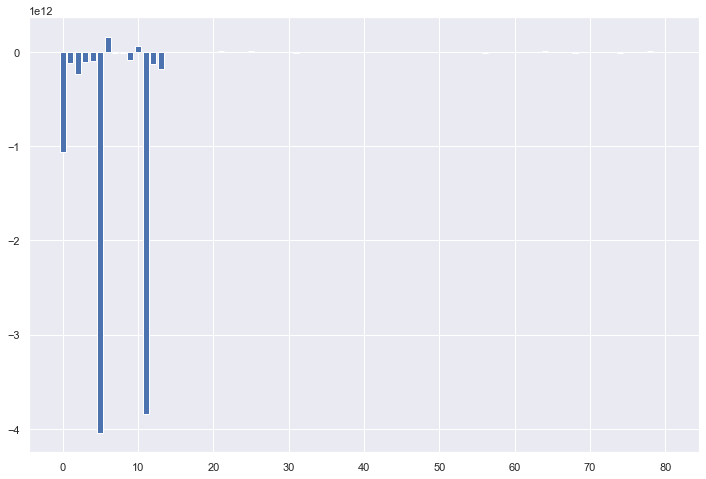

In [96]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(sgd_importance))], sgd_importance)
#plt.yscale('symlog')
plt.show()

## Gradient Boosting Regressor

In [97]:
gradient_model = GradientBoostingRegressor(random_state=1234)

In [98]:
gradient_model.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
gradient_model.score(X,y)

0.9914373641857182

In [100]:
gradient_model.feature_importances_

array([3.12847159e-03, 1.69365522e-02, 2.53770897e-02, 1.60028379e-02,
       1.17972719e-03, 1.47834601e-01, 5.94445202e-01, 7.50278086e-03,
       5.97190746e-03, 7.42411263e-03, 5.32406910e-02, 1.17946201e-03,
       1.31821317e-03, 6.27116912e-02, 1.67426970e-05, 2.82291818e-05,
       6.60984046e-04, 6.93143523e-04, 0.00000000e+00, 1.03895180e-03,
       7.54142806e-09, 3.10536544e-04, 8.23402355e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.42774018e-03, 0.00000000e+00,
       1.63816766e-04, 4.84556660e-06, 2.11324041e-04, 3.06764663e-06,
       1.05928478e-04, 5.19080484e-04, 2.51084584e-04, 5.74966900e-04,
       0.00000000e+00, 2.69548782e-05, 0.00000000e+00, 4.44232440e-04,
       1.52133194e-08, 1.21577733e-05, 0.00000000e+00, 0.00000000e+00,
       2.13390195e-04, 2.86860151e-03, 4.04796681e-04, 0.00000000e+00,
       9.38175663e-04, 4.76327152e-03, 0.00000000e+00, 9.48233207e-03,
       5.24530873e-04, 0.00000000e+00, 5.63053158e-05, 4.26121177e-05,
      

In [101]:
gradient_model.n_features_

81

In [102]:
#gradient_model.max_features_

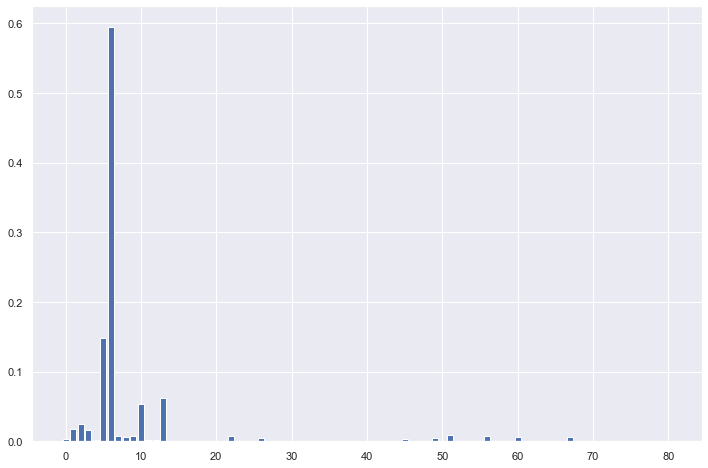

In [103]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(gradient_model.feature_importances_))], gradient_model.feature_importances_)
#plt.yscale('log')
plt.show()

## Bagging Regressor

In [104]:
bagging_model = BaggingRegressor(n_estimators=100, random_state=1234)

In [105]:
bagging_model.fit(X,y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=1234, verbose=0,
                 warm_start=False)

In [106]:
bagging_model.score(X,y)

0.9839480814569859

In [107]:
bagging_model.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [108]:
bagging_model.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 

In [109]:
bagging_model.estimators_samples_

[array([ 42, 100, 188, 103, 117,  26, 135, 174,  76,  67,  19,  42,  44,
         65,  97, 113,  20,  75, 120, 140,  89,   4, 112,  11, 119, 128,
        149,   7,  39,  83, 196,  58, 151,  54,  80,  26,  92, 104,  92,
        111, 169, 159, 154, 176,  14,  61,  31, 177,  49, 138, 117, 165,
         78, 127,  58, 110,  55,  18,  49,  15, 125, 113, 142, 187, 122,
          9, 114,  63, 154,  12, 125,  15,  97,   9, 182,  45,  73, 172,
        155, 203,  29,  90, 139,  50,  48,  84, 144, 106, 177,  74,   7,
        190, 150,  76,   7, 170, 130,   6,   3, 193, 116,  89,   5,  57,
         17,  69,   8,  29, 103, 199, 161,  50, 153, 176,  20, 126,  79,
         50,   1, 200,  70,  16, 196,   4,  44,  21, 149,  43,  47, 160,
        168, 200,  79,  55, 190,  91,  90, 185, 109,  58, 151,  43,  70,
        152, 110,  51, 181,   2,  26, 197, 148,  38, 196,  81, 132,  28,
        186,   2,  86, 112, 172,   9,  79, 168,  47, 133, 159,  66,  54,
        164, 180, 203,  55,  16, 119,  81,   0,   2

## AdaBoost Regressor

In [110]:
ada_model = AdaBoostRegressor(random_state=1234, n_estimators=100)

In [111]:
ada_model.fit(X,y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=1234)

In [112]:
ada_model.score(X,y)

0.9459524909811992

In [113]:
ada_model.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=822569775, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=318655632, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,

In [114]:
ada_model.feature_importances_

array([3.44950975e-03, 1.31114372e-02, 2.91266432e-02, 2.25124343e-02,
       6.18927485e-03, 6.91374251e-02, 6.64466158e-01, 1.50609861e-02,
       7.86880093e-03, 2.66043110e-02, 2.81124927e-02, 5.44347651e-03,
       1.09069784e-02, 4.75553826e-02, 0.00000000e+00, 0.00000000e+00,
       4.69563927e-03, 5.74114827e-03, 6.10814095e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.29059207e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.15662187e-04, 7.92286630e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.44210664e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.35872316e-04, 9.87001322e-04, 1.35752714e-03, 0.00000000e+00,
       3.87521145e-03, 3.79377390e-04, 3.43504131e-05, 5.56598066e-03,
       7.55943057e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

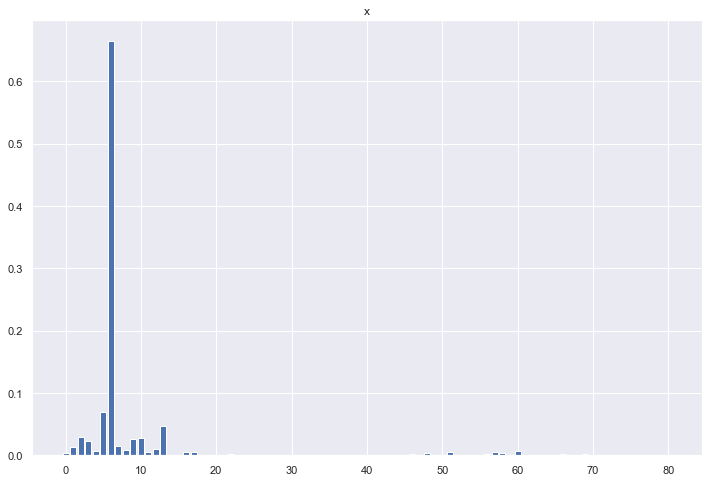

In [117]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(ada_model.feature_importances_))], ada_model.feature_importances_)
#plt.yscale('log')
plt.title('x')
plt.show()

# Train-Test split for Hyperparameter Tuning

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
print(len(X_train), len(X_test), len(y_train), len(y_test))

164 41 164 41


In [37]:
pipelines = {
#  'linear': make_pipeline(StandardScaler(), LinearRegression()),
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state = 123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state = 123)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state = 123)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state = 123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state = 123)),
    'dt': make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state = 123))
}

lasso_hyperparameters = {
    'lasso__alpha': [0.001, 1, 1000]
}

ridge_hyperparameters = {
    'ridge__alpha': [0.001, 1, 1000]
}

enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 1, 5, 1000],
    'elasticnet__l1_ratio': [0.05, 0.3, 0.9]
}

rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [10, 300, 1000],
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
#    'randomforestregressor__bootstrap': [True, False],
    'randomforestregressor__max_depth': [10, 100, None],
#    'randomforestregressor__min_samples_leaf': [1, 2, 4],
#    'randomforestregressor__min_samples_split': [2, 5, 10]
}

gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [10, 300, 1000], 
    'gradientboostingregressor__learning_rate' : [0.1, 0.3, 0.9],
    'gradientboostingregressor__max_depth': [1, 5, 9]
}

dt_hyperparameters = {
    'decisiontreeregressor__criterion': ['mse', 'friedman_mse', 'mae'],
    'decisiontreeregressor__splitter': ['best', 'random']
}

In [38]:
print(pipelines.keys())

hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'dt': dt_hyperparameters
}

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb', 'dt'])


In [39]:
for key, value in pipelines.items():
    print (key, type(value))
    

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
dt <class 'sklearn.pipeline.Pipeline'>


In [40]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso', 'dt']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.
dt was found in hyperparameters, and it is a grid.


# Importing GridSearchCV and Fitting models

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    
    
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.
dt has been fitted.


## Checking the status of the algorithms after importing GridSearchCV

In [43]:
for key, name in fitted_models.items():
    print(key, type(name))
    

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>
dt <class 'sklearn.model_selection._search.GridSearchCV'>


In [44]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.
dt has been fitted.


## Calculating the 'best_score_' for the algorithms

In [45]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.7600046341986368
ridge 0.7570594949571976
enet 0.7804518767668094
rf 0.8464073553854805
gb 0.7922973486343411
dt 0.7410901712967235


## Calculating the Metrics for the algorithms

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

for name, model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    
    print(name)
    print('--------')
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print( 'MSE', mean_squared_error(y_test, pred))
    print( 'RMSE', np.sqrt(mean_squared_error(y_test, pred)))
    print('--------')

lasso
--------
R^2: 0.24515452272247906
MAE: 2571.7055428383096
MSE 21064115.738040138
RMSE 4589.565964014478
--------
ridge
--------
R^2: 0.5886766167329651
MAE: 2226.355563674445
MSE 11478062.214995112
RMSE 3387.9288975707727
--------
enet
--------
R^2: 0.7582908172344001
MAE: 1938.359871157927
MSE 6744943.639438181
RMSE 2597.1029320067737
--------
rf
--------
R^2: 0.8782426543464736
MAE: 1248.080937862178
MSE 3397663.3602581876
RMSE 1843.2751721482573
--------
gb
--------
R^2: 0.8329713687301558
MAE: 1536.0794195930923
MSE 4660967.743125145
RMSE 2158.9274520291656
--------
dt
--------
R^2: 0.8160684414558528
MAE: 1614.1675767503943
MSE 5132647.347938743
RMSE 2265.5346715375476
--------


## Checking the 'Type' of the best performing algorithm

In [47]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

## Checking the 'Type' of the 'best_estimator_'

In [48]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

## Checking the Hyperparameter values of 'best_estimator_'

In [49]:
print(fitted_models['rf'].best_estimator_)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=10,
                                       max_features='log2', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=300, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)


## Checking the 'index' of the best estimator


In [50]:
print(fitted_models['rf'].best_index_)

7


## Checking the best performing parameters

In [51]:
print(fitted_models['rf'].best_params_)

{'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__n_estimators': 300}


## Plotting actual over predicted values

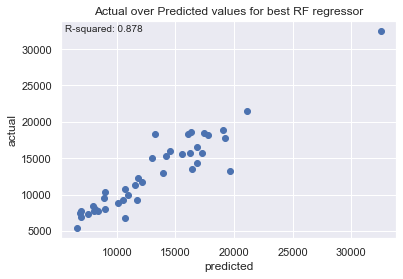

In [59]:
rf_pred = fitted_models['rf'].predict(X_test)

plt.annotate('R-squared: 0.878', xy=(0.01, 0.95), xycoords='axes fraction')
plt.scatter(rf_pred, y_test)
plt.title('Actual over Predicted values for best RF regressor')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()